In [1]:
#required packages
!pip install mne tigramite numpy scipy matplotlib gudhi

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install "numpy<2"

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
data_path='../data/eeg1.edf'
annot_path='../data/annotations_2017_A.csv'

raw = mne.io.read_raw_edf(data_path, preload=True)
print(raw.info)


Extracting EDF parameters from C:\Users\dhruv\data\eeg1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1790207  =      0.000 ...  6992.996 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1-REF, EEG Fp2-REF, EEG F3-REF, EEG F4-REF, EEG C3-REF, ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2011-11-11 11:11:11 UTC
 nchan: 21
 projs: []
 sfreq: 256.0 Hz
 subject_info: <subject_info | his_id: >
>


### Summary of the Loaded EEG Data (`eeg1.edf`)

This output provides a metadata summary of the raw EEG recording file. It tells us about the structure and parameters of the data before any analysis.

* **Channels**: The recording contains **21 EEG channels** (`nchan: 21`). The names (`ch_names`) like `Fp1-REF` follow the standard 10-20 system for electrode placement on the scalp.

* **Duration**: The total recording length is **6993 seconds** (approximately 116.5 minutes).

* **Sampling Frequency (`sfreq`)**: The data was sampled at **256 Hz**. This is a critical parameter, meaning the signal from each channel was measured 256 times every second.

* **Filters**:
    * `highpass: 0.0 Hz`: No high-pass filter was applied during recording, so very slow signal drifts are still present in the data.
    * `lowpass: 128.0 Hz`: A low-pass filter was applied, meaning frequencies above 128 Hz have been removed. This is consistent with the Nyquist frequency (half the sampling rate).

* **Status**:
    * `custom_ref_applied: False`: The data has not yet been re-referenced, a standard preprocessing step to improve signal quality.

In [8]:
data, times = raw.get_data(return_times=True)
print(f"Data shape: {data.shape}, Duration: {times[-1]/60:.2f} min")


annots = pd.read_csv(annot_path)
print(annots.head()) 
print(f"Annot shape: {annots.shape}")


Data shape: (21, 1790208), Duration: 116.55 min
     1    2    3    4    5    6    7    8    9   10  ...   70   71   72   73  \
0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    74   75   76   77   78   79  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 79 columns]
Annot shape: (15416, 79)


### Understanding the Annotation Data Structure

The annotation file is a large grid (matrix) where:

* **Each ROW** represents a specific time epoch (a ~0.45 second window of the EEG recording).
* **Each COLUMN** represents a specific patient (e.g., the column `'1'` corresponds to the file `eeg1.edf`).
* **The VALUE** in each cell (`0.0` or `1.0`) is the expert's label for that specific patient during that specific time epoch.
    * `1.0` signifies that a **seizure was present**.
    * `0.0` signifies that **no seizure was present**.

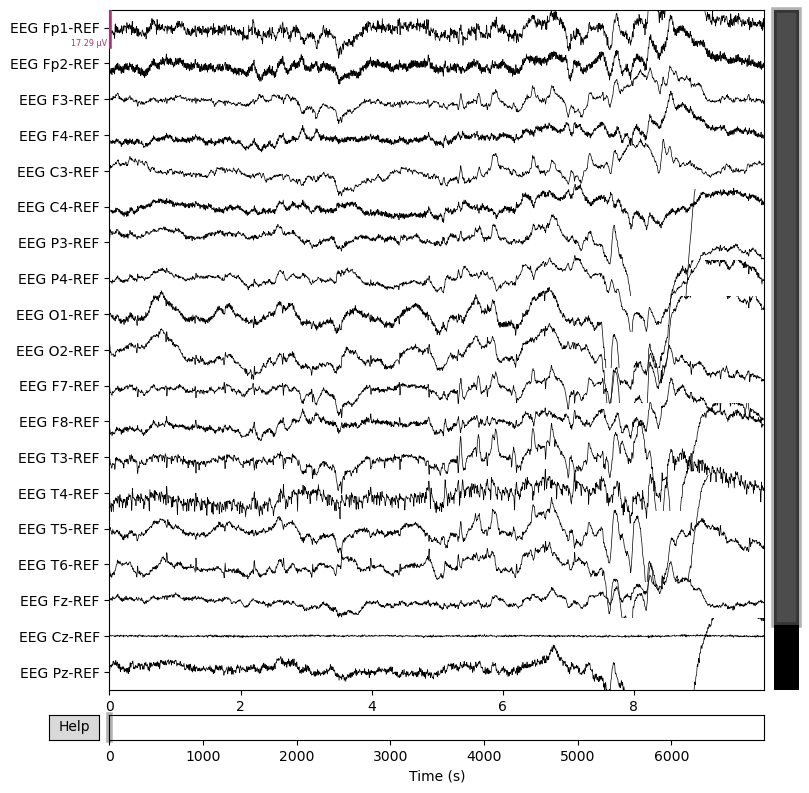

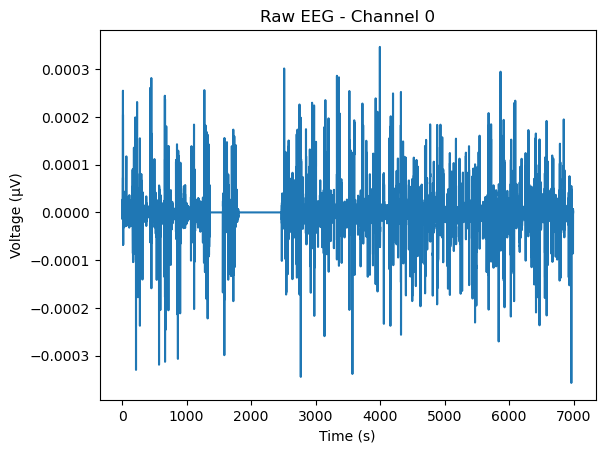

In [9]:
# Plot first 10 seconds, all channels
raw.plot(start=0, duration=10, n_channels=19, scalings='auto')
plt.show()

# Plot a specific channel over full time
plt.plot(times, data[0, :])  # Channel 0 (e.g., Fp1-F3)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (µV)')
plt.title('Raw EEG - Channel 0')
plt.show()

In [11]:
annot_path_b='../data/annotations_2017_B.csv'

annots_b = pd.read_csv(annot_path_b)
print(annots_b.head()) 
print(f"Annot shape: {annots.shape}")

     1    2    3    4    5    6    7    8    9   10  ...   70   71   72   73  \
0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    74   75   76   77   78   79  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  1.0  0.0  0.0  0.0  
2  0.0  0.0  1.0  0.0  0.0  0.0  
3  0.0  0.0  1.0  0.0  0.0  0.0  
4  0.0  0.0  1.0  0.0  0.0  0.0  

[5 rows x 79 columns]
Annot shape: (15416, 79)


In [12]:
annot_path_c='../data/annotations_2017_C.csv'

annots_c = pd.read_csv(annot_path_c)
print(annots_c.head()) 
print(f"Annot shape: {annots.shape}")

     1    2    3    4    5    6    7    8    9   10  ...   70   71   72   73  \
0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    74   75   76   77   78   79  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 79 columns]
Annot shape: (15416, 79)


Reading EDF: ..\data\eeg1.edf
Sampling freq: 256.0 Hz; total time: 6993.0 s; channels: 21
Found annotation CSV: ..\data\annotations_2017_B.csv
Annotation shape: (15416, 79)
Using annotation column: 1
Annotation rows: 15416; inferred epoch length ≈ 0.4536 s
Generated epochs: (15416, 21, 116)
Channels to plot (in order): ['EEG F3-REF', 'EEG F7-REF', 'EEG Fz-REF', 'EEG C4-REF']
Using 15416 aligned epochs for plotting
Selected epoch indices -> No seizure: 0 Seizure: 32
Saved figure to: ..\data\epoch_seizure_comparison.png


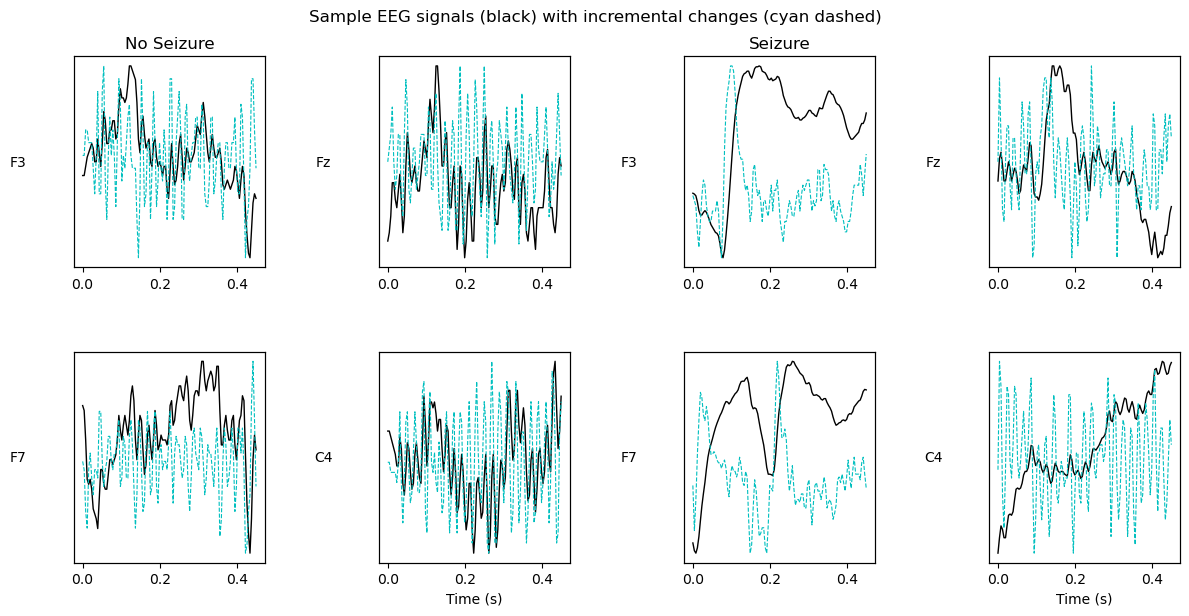

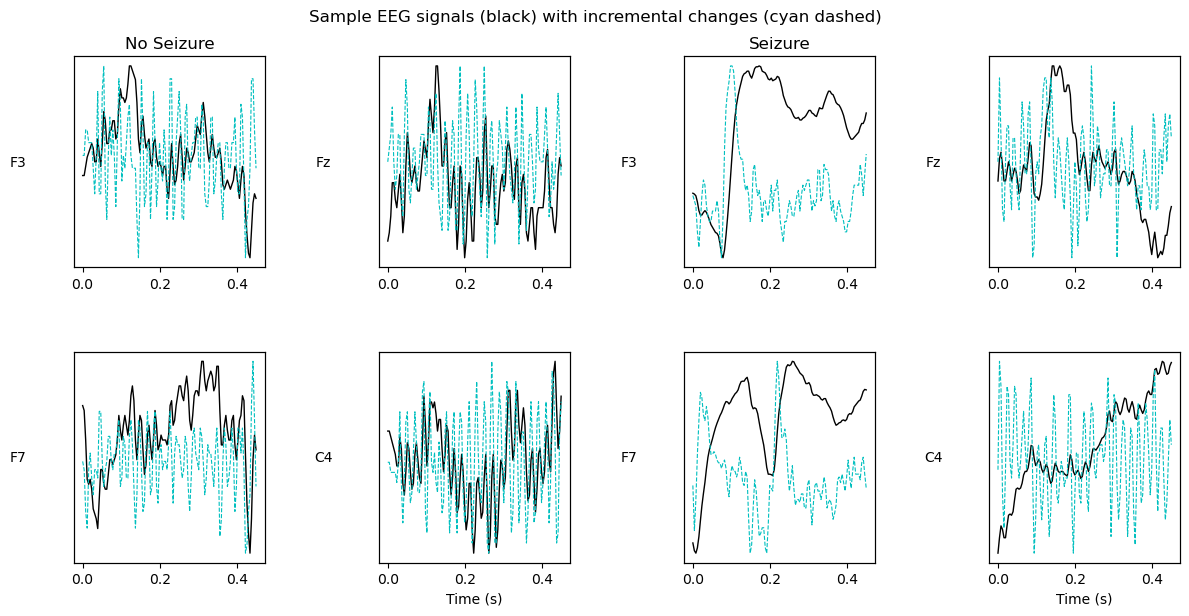

In [14]:

import numpy as np
import pandas as pd
import mne
import matplotlib.pyplot as plt
from pathlib import Path
import re
import warnings
warnings.filterwarnings("ignore")

# ----------------- USER CONFIG (adjust only if you must) -----------------
# EDF path used in your notebook - keep this if your data folder is the same
edf_path = Path("../data/eeg1.edf")   # or Path(r"C:\Users\dhruv\data\eeg1.edf")
annot_paths = [
    Path("../data/annotations_2017_B.csv"),
    Path("../data/annotations_2017_C.csv")
]
# channels of interest (the raw.ch_names printed earlier include 'EEG F3-REF' etc)
desired_channels = ["F3", "F7", "Fz", "C4"]
output_fig_path = Path("../data/epoch_seizure_comparison.png")
# ----------------------------------------------------------------------------

# 1) Load EDF
print("Reading EDF:", edf_path)
raw = mne.io.read_raw_edf(str(edf_path), preload=True, verbose=False)
sfreq = raw.info['sfreq']
total_seconds = raw.n_times / sfreq
print(f"Sampling freq: {sfreq} Hz; total time: {total_seconds:.1f} s; channels: {len(raw.ch_names)}")

# 2) Load annotations CSV (pick the first file that exists)
annot_df = None
for p in annot_paths:
    if p.exists():
        print("Found annotation CSV:", p)
        try:
            annot_df = pd.read_csv(p, header=0, index_col=None)
        except Exception:
            annot_df = pd.read_csv(p, header=None, index_col=None)
        print("Annotation shape:", annot_df.shape)
        break
if annot_df is None:
    raise FileNotFoundError("No annotation CSV found in annot_paths - please provide the CSV used in your notebook.")

# 3) Determine which column corresponds to this EDF file
# heuristic: find digit in filename like 'eeg1' -> col '1', or match file basename in header
basename = edf_path.name
m = re.search(r"(\d+)", basename)
candidate_col = None
if m:
    colnum = m.group(1)
    # try matching by column name '1' or integer 1 or 'eeg1' etc
    for col in annot_df.columns:
        if str(col).strip() == colnum or str(col).strip().lower() == f"eeg{colnum}":
            candidate_col = col
            break
# fallback: use first column (common)
if candidate_col is None:
    candidate_col = annot_df.columns[0]
print("Using annotation column:", candidate_col)

# 4) Read the annotation series and infer epoch length
labels = annot_df[candidate_col].astype(float).values
n_epochs_annot = len(labels)
epoch_length_s = total_seconds / n_epochs_annot
print(f"Annotation rows: {n_epochs_annot}; inferred epoch length ≈ {epoch_length_s:.4f} s")

# 5) Make fixed-length epochs using the inferred epoch length
# mne.make_fixed_length_epochs requires duration > 0
if epoch_length_s <= 0 or epoch_length_s * sfreq < 2:
    raise ValueError("Inferred epoch length too small or invalid. Check annotation alignment.")
epochs = mne.make_fixed_length_epochs(raw, duration=epoch_length_s, preload=True, verbose=False)
data = epochs.get_data()  # shape (n_epochs, n_channels, n_times)
print("Generated epochs:", data.shape)

# 6) Pick channels that match desired_channels from raw.ch_names (robust substring matching)
picked_channels = []
for target in desired_channels:
    found = next((ch for ch in raw.ch_names if target.lower() in ch.lower()), None)
    if found:
        picked_channels.append(found)
    else:
        print(f"Warning: channel matching '{target}' not found - skipping.")
print("Channels to plot (in order):", picked_channels)
if len(picked_channels) == 0:
    raise ValueError("No matching channels found in EDF. Check the ch_names printed in your notebook.")

# 7) Align labels length to produced epochs (defensive)
n_epochs = data.shape[0]
L = min(n_epochs, len(labels))
labels = labels[:L]
data = data[:L]  # trim epochs if EDF created slightly more/less
print(f"Using {L} aligned epochs for plotting")

# 8) Find indices for first 'no seizure' and first 'seizure'
zeros = np.where(labels == 0)[0]
ones = np.where(labels == 1)[0]
no_seiz_idx = int(zeros[0]) if zeros.size > 0 else 0
seiz_idx = int(ones[0]) if ones.size > 0 else min(L-1, no_seiz_idx + max(1, int(1/epoch_length_s)))
print("Selected epoch indices -> No seizure:", no_seiz_idx, "Seizure:", seiz_idx)

# 9) Extract channel indices relative to raw channel order in epochs
chan_indices = [raw.ch_names.index(ch) for ch in picked_channels]
epoch_no = data[no_seiz_idx][chan_indices]   # shape (n_ch, n_times)
epoch_sz = data[seiz_idx][chan_indices]

times = np.arange(epoch_no.shape[1]) / sfreq  # x axis seconds for one epoch

# 10) Plotting routine to match the style of the example image
def plot_block(axs, epoch_array, title):
    # epoch_array: channels x times
    for i, ax in enumerate(axs):
        sig = epoch_array[i]
        # incremental differences
        inc = np.concatenate(([0.0], np.diff(sig)))
        ax.plot(times, sig, color='black', linewidth=1)
        ax_t = ax.twinx()
        # scale incremental trace for visibility: small signals often need scaling
        # choose scale = 1.0 by default; you can change multiplier if inc appears too small
        scale = 1.0
        ax_t.plot(times, inc * scale, linestyle='--', linewidth=0.8, color='c')
        # label channel (short name)
        lab = picked_channels[i]
        lab_short = lab.replace('EEG ', '').replace('-REF','').strip()
        ax.set_ylabel(lab_short, rotation=0, labelpad=40, va='center')
        ax.set_yticks([])  # clean look like figure
        ax_t.set_yticks([]) # hide twin ticks
    axs[-1].set_xlabel("Time (s)")
    axs[0].set_title(title)

# 11) Create figure with left=No Seizure, right=Seizure (2 columns of 2 rows)
fig = plt.figure(figsize=(12, 6))
# create 2x4 grid but we will place a 2x2 left and a 2x2 right (similar arrangement to your target)
# left block positions
ax00 = plt.subplot2grid((2,4), (0,0))
ax10 = plt.subplot2grid((2,4), (1,0))
ax01 = plt.subplot2grid((2,4), (0,1))
ax11 = plt.subplot2grid((2,4), (1,1))
# right block positions
ax02 = plt.subplot2grid((2,4), (0,2))
ax12 = plt.subplot2grid((2,4), (1,2))
ax03 = plt.subplot2grid((2,4), (0,3))
ax13 = plt.subplot2grid((2,4), (1,3))

left_axes = [ax00, ax10, ax01, ax11]
right_axes = [ax02, ax12, ax03, ax13]

# Only use as many channels as we found (max 4)
n_ch_plot = min(len(picked_channels), 4)
plot_block(left_axes[:n_ch_plot], epoch_no[:n_ch_plot], "No Seizure")
plot_block(right_axes[:n_ch_plot], epoch_sz[:n_ch_plot], "Seizure")

# Add small center labels under left/right
plt.tight_layout()
plt.subplots_adjust(wspace=0.6, hspace=0.4)
plt.suptitle("Sample EEG signals (black) with incremental changes (cyan dashed)", y=1.02)
plt.savefig(output_fig_path, bbox_inches='tight', dpi=200)
print("Saved figure to:", output_fig_path)
plt.show()
